In [1]:
# convert tifs to .npy file 

import os
import numpy as np
import imageio as misc # I think this is deprecated, we'll see!
import matplotlib.pyplot as plt
import tensorflow as tf

def getData(myDir,myCurDir):
    myStart = 0
    for myFile in myCurDir:
        #print(myDir+myFile)
        myTempImg = misc.imread(myDir+myFile)
        if len(myTempImg.shape)==3:
            myTempImg = myTempImg[:,:,0]
        
            
        if myStart == 0:
            myDimX = np.shape(myTempImg)[0]
            myDimY = np.shape(myTempImg)[1]
            myData = np.reshape(myTempImg, (1,myDimX, myDimY))
            myStart = 1
        else:
            myData = np.append(myData,np.reshape(myTempImg, (1,myDimX, myDimY)),axis=0)
    return myData


/home/radlr/anaconda3/envs/cogComMic/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

# get a list
""" 
A. Lucchi Y. Li and P. Fua, Learning for Structured Prediction Using Approximate Subgradient Descent with Working Sets, Conference on Computer Vision and Pattern Recognition, 2013.
 
A. Lucchi, K.Smith, R. Achanta, G. Knott, P. Fua, Supervoxel-Based Segmentation of Mitochondria in EM Image Stacks with Learned Shape Features, IEEE Transactions on Medical Imaging, Vol. 30, Nr. 11, October 2011.

https://cvlab.epfl.ch/data/em"""

myDir = "../datasets/epflEM/imageSequences/testImgs/"
myCurDir = os.listdir(myDir)
myCurDir.sort()

myData = getData(myDir,myCurDir)
myDir = "../datasets/epflEM/imageSequences/testLabels/"
myCurDir = os.listdir(myDir)
myCurDir.sort()

myDataLabels = getData(myDir,myCurDir)

myDir = "../datasets/epflEM/imageSequences/trainImgs/"
myCurDir = os.listdir(myDir)
myCurDir.sort()

myDataX = getData(myDir,myCurDir)

myDir = "../datasets/epflEM/imageSequences/trainLabels/"
myCurDir = os.listdir(myDir)
myCurDir.sort()

myDataY = getData(myDir,myCurDir)


# check if we did it right

print(np.shape(myData),np.shape(myDataLabels))

# crop images into quarters

for cx in range(2):
    for cy in range(4):
        if(cx == 0 and cy == 0):
            X = myDataX[:,0:256,0:256]
            Y = myDataY[:,0:256,0:256]
            
            XTest = myData[:,0:256,0:256]
            YTest = myDataLabels[:,0:256,0:256]
        else:
            X = np.append(X,myDataX[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)
            Y = np.append(Y,myDataY[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)
            XTest = np.append(XTest,myData[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)
            YTest = np.append(YTest,myDataLabels[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)

# shuffle data
np.random.seed(13)
np.random.shuffle(X)

np.random.seed(13)
np.random.shuffle(Y)

# set aside 10% for validation dataset
noVal = int(0.2*len(X))
XVal = X[0:noVal,:,:]
YVal = Y[0:noVal,:,:]

X = X[noVal:len(X),:,:]
Y = Y[noVal:len(Y),:,:]

print("size of training set X",X.shape)
print("size of validation set X",XVal.shape)
print("size of test set X",XTest.shape)

print("size of training set Y",Y.shape)
print("size of validation set Y",YVal.shape)
print("size of test set Y",YTest.shape)
if(1):
    #Save data and labels in npy format
    np.save("../datasets/epflEM/epflTestX.npy",XTest)
    np.save("../datasets/epflEM/epflTestY.npy",YTest)
    np.save("../datasets/epflEM/epflXVal.npy",XVal)
    np.save("../datasets/epflEM/epflYVal.npy",YVal)
    np.save("../datasets/epflEM/epflX.npy",X)
    np.save("../datasets/epflEM/epflY.npy",Y)


(165, 768, 1024) (165, 768, 1024)
size of training set X (1056, 256, 256)
size of validation set X (264, 256, 256)
size of test set X (1320, 256, 256)
size of training set Y (1056, 256, 256)
size of validation set Y (264, 256, 256)
size of test set Y (1320, 256, 256)


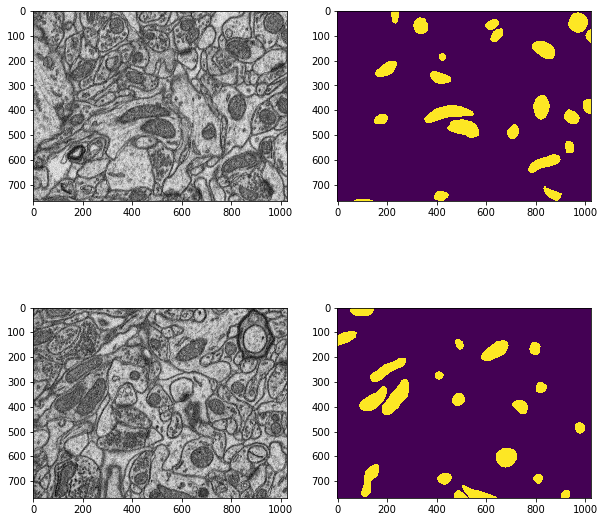

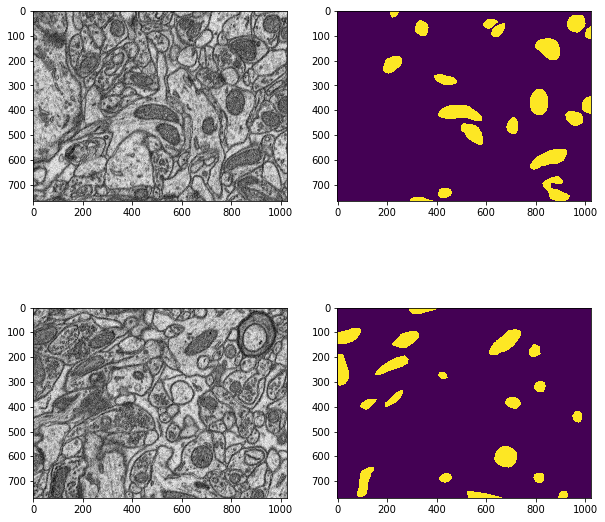

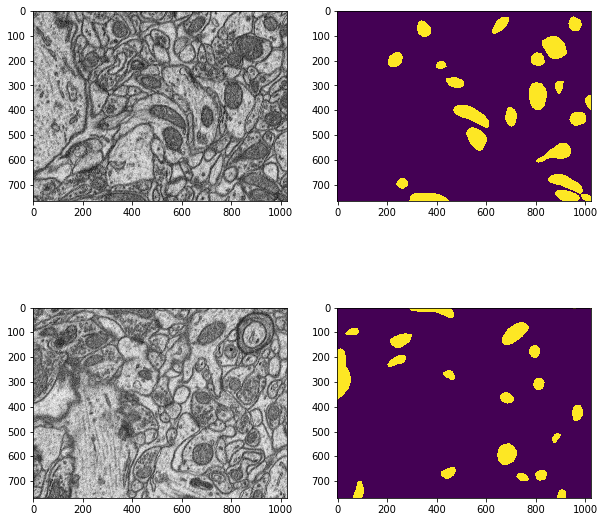

In [3]:
for ck in range(0,50,20):
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.imshow(myDataX[ck,:,:],cmap="gray")
    plt.subplot(222)
    plt.imshow(myDataY[ck,:,:])

    plt.subplot(223)
    plt.imshow(myData[ck,:,:],cmap="gray")
    plt.subplot(224)
    plt.imshow(myDataLabels[ck,:,:])
plt.show()



In [12]:

# get a list
"""    Albert Cardona, Stephan Saalfeld, Stephan Preibisch, Benjamin Schmid, 
Anchi Cheng, Jim Pulokas, Pavel Tomancak and Volker Hartenstein (10, 2010), 
"An Integrated Micro- and Macroarchitectural Analysis of the Drosophila Brain 
by Computer-Assisted Serial Section Electron Microscopy", PLoS Biol 
(Public Library of Science) 8 (10): e1000502, doi:10.1371/journal.pbio.1000502
http://brainiac2.mit.edu/isbi_challenge/home"""

myDir = "../datasets/isbiEM/imageSequences/trainImgs/"
myCurDir = os.listdir(myDir)

myData = getData(myDir,myCurDir)

myDir = "../datasets/isbiEM/imageSequences/trainLabels/"
myCurDir = os.listdir(myDir)


myDataLabels = getData(myDir,myCurDir)

# check if we did it right

print(np.shape(myData),np.shape(myDataLabels))

# crop images into quarters

for cx in range(2):
    for cy in range(2):
        if(cx == 0 and cy == 0):
            X = myData[:,0:256,0:256]
            Y = myDataLabels[:,0:256,0:256]
        else:
            X = np.append(X,myData[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)
            Y = np.append(Y,myDataLabels[:,cx*256:cx*256+256,cy*256:cy*256+256],axis=0)
print(X.shape,Y.shape) 

# shuffle data
np.random.seed(13)
np.random.shuffle(X)

np.random.seed(13)
np.random.shuffle(Y)

# set aside 10% for validation dataset

XVal = X[0:12,:,:]
YVal = Y[0:12,:,:]

X = X[12:len(X),:,:]
Y = Y[12:len(X),:,:]

if(1):
    #Save data and labels in npy format
    np.save("../datasets/isbiEM/isbiX.npy",X)
    np.save("../datasets/isbiEM/isbiY.npy",Y)
    np.save("../datasets/isbiEM/isbiXVal.npy",XVal)
    np.save("../datasets/isbiEM/isbiYVal.npy",YVal)


(30, 512, 512) (30, 512, 512)
(120, 256, 256) (120, 256, 256)


In [2]:

# get a list
"""data from Coelho, Shariff, and Murphy. 'NUCLEAR SEGMENTATION IN MICROSCOPE CELL IMAGES: 
A HAND-SEGMENTED DATASET AND COMPARISON OF ALGORITHMS' IEEE (2009)"""
myDir = "../datasets/coelhoMurphy2009/images/dna-images/gnf/"
myCurDir = os.listdir(myDir)

myData1 = getData(myDir,myCurDir)

myDir = "../datasets/coelhoMurphy2009/images/dna-images/ic100/"
myCurDir = os.listdir(myDir)


myData2 = getData(myDir,myCurDir)

# check if we did it right


# combine the two datasets
myData = np.append(myData1[:,0:1024,0:1344],myData2[:,0:1024,0:1344],axis=0)

In [3]:
for cx in range(2):
    for cy in range(2):
        print(cx,cy)
        if (cx==0 and cy==0):
            myDataX = myData[:,0:512,0:672]
        else:
            myDataX = np.append(myDataX,myData[:,cx:512+cx,cy:cy+672],axis=0)
print(myDataX.shape)

0 0
0 1
1 0
1 1
(400, 512, 672)


In [8]:
# save the data

np.save("./coelhoData2.npy",myDataX)

In [5]:
myData = myDataX
print(np.shape(myData))
mySeed = 42
np.random.seed(mySeed)
nVal = int(0.1*len(myData))
nTrain = int(0.8*len(myData))

np.random.shuffle(myData)

myTrain = myData[0:nTrain,:,:]
myVal = myData[nTrain:nTrain+nVal,:,:]
myTest = myData[nTrain+nVal:len(myData)-1,:,:]


print(np.shape(myTrain))

print(np.shape(myVal))

print(np.shape(myTest))
np.save("./coelTrain2.npy",myTrain)
np.save("./coelVal2.npy",myVal)
np.save("./coelTest2.npy",myTest)



(400, 512, 672)
(320, 512, 672)
(40, 512, 672)
(39, 512, 672)
